<a href="https://colab.research.google.com/github/KevalBavadiya/Gender-Identification-using-facial-image/blob/main/Gender_Identification_Using_Image_master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kevalbavvadiya","key":"b16cf5484c5a2d7cec7db144c1054715"}'}

In [ ]:
!ls -lha kaggle.json

!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 70 Mar 11 15:22 kaggle.json


In [ ]:
!kaggle datasets download -d abhikjha/utk-face-cropped


 99% 231M/232M [00:12<00:00, 20.1MB/s]
100% 232M/232M [00:12<00:00, 18.9MB/s]


In [ ]:
! ls


drive  kaggle.json  sample_data  utk-face-cropped.zip


In [ ]:
!mkdir input

In [ ]:
!unzip utk-face-cropped.zip -d input


Streaming output truncated to the last 5000 lines.
  inflating: input/utkcropped/utkcropped/53_0_1_20170116192938845.jpg.chip.jpg  
  inflating: input/utkcropped/utkcropped/53_0_1_20170117181950281.jpg.chip.jpg  
  inflating: input/utkcropped/utkcropped/53_0_1_20170120222553113.jpg.chip.jpg  
  inflating: input/utkcropped/utkcropped/53_0_1_20170120222956787.jpg.chip.jpg  
  inflating: input/utkcropped/utkcropped/53_0_1_20170120223004304.jpg.chip.jpg  
  inflating: input/utkcropped/utkcropped/53_0_2_20170104210010763.jpg.chip.jpg  
  inflating: input/utkcropped/utkcropped/53_0_2_20170112215433623.jpg.chip.jpg  
  inflating: input/utkcropped/utkcropped/53_0_2_20170112221930338.jpg.chip.jpg  
  inflating: input/utkcropped/utkcropped/53_0_2_20170116192925824.jpg.chip.jpg  
  inflating: input/utkcropped/utkcropped/53_0_2_20170116192934154.jpg.chip.jpg  
  inflating: input/utkcropped/utkcropped/53_0_2_20170119205816456.jpg.chip.jpg  
  inflating: input/utkcropped/utkcropped/53_0_3_2017010422

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import cv2
import os

import tensorflow as tf

from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential,load_model,Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,AvgPool2D,GlobalAveragePooling2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split


from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
!ls

drive  input  kaggle.json  sample_data	utk-face-cropped.zip


In [ ]:
path = "./input/utkcropped/utkcropped"
pixels = []
age = []
gender = [] 

i=0
count=0
for img in os.listdir(path):
  i=i+1
  if(int(img.split("_")[0])>20):
    genders = img.split("_")[1]
    img = cv2.imread(str(path)+"/"+str(img))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(96,96))
    img  = np.array(img,dtype=float)
    img /=255.0
    pixels.append(img)
    if int(genders)>1:
      genders=1
    gender.append(np.array(genders))

pixels = np.array(pixels)
gender = np.array(gender,np.uint64)
print(count)

0


In [ ]:
len(pixels)

18832

In [ ]:
len(gender)

18832

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(pixels,gender,random_state=100,test_size=0.20)

In [ ]:
len(x_train)

15065

In [ ]:
len(x_test)

3767

In [ ]:
input = Input(shape = (96,96,1))

conv1 = Conv2D(32,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(input)
conv1 = Dropout(0.1)(conv1)
conv1 = Activation('relu')(conv1)
pool1 = MaxPooling2D(pool_size = (2,2)) (conv1)

conv2 = Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool1)
conv2 = Dropout(0.1)(conv2)
conv2 = Activation('relu')(conv2)
pool2 = MaxPooling2D(pool_size = (2,2)) (conv2)

conv3 = Conv2D(128,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool2)
conv3 = Dropout(0.1)(conv3)
conv3 = Activation('relu')(conv3)
pool3 = MaxPooling2D(pool_size = (2,2)) (conv3)

conv4 = Conv2D(256,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool3)
conv4 = Dropout(0.1)(conv4)
conv4 = Activation('relu')(conv4)
pool4 = MaxPooling2D(pool_size = (2,2)) (conv4)

conv5 = Conv2D(512,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool4)
conv5 = Dropout(0.1)(conv5)
conv5 = Activation('relu')(conv5)
pool5 = MaxPooling2D(pool_size = (3,3)) (conv5)



flatten = Flatten()(pool5)

dense_1 = Dense(128,activation='relu')(flatten)

drop_1 = Dropout(0.2)(dense_1)

output = Dense(2,activation="sigmoid")(drop_1)

In [ ]:
model = Model(inputs=input,outputs=output)
model.compile(optimizer="adam",loss=["sparse_categorical_crossentropy"],metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 96, 96, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 96, 96, 32)        320       
                                                                 
 dropout_6 (Dropout)         (None, 96, 96, 32)        0         
                                                                 
 activation_5 (Activation)   (None, 96, 96, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 64)        18496     
                                                           

In [ ]:

model_path='./content/MyDrive/output/gender_model.h5'
checkpointer = ModelCheckpoint(model_path, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

In [ ]:
save = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,callbacks=[callback_list])

Epoch 1/30
471/471 [==============================] - ETA: 0s - loss: 0.5583 - accuracy: 0.7579
Epoch 1: loss improved from inf to 0.55829, saving model to ./content/MyDrive/output/gender_model.h5
471/471 [==============================] - 25s 24ms/step - loss: 0.5583 - accuracy: 0.7579 - val_loss: 0.3851 - val_accuracy: 0.8760
Epoch 2/30
470/471 [============================>.] - ETA: 0s - loss: 0.3543 - accuracy: 0.8816
Epoch 2: loss improved from 0.55829 to 0.35400, saving model to ./content/MyDrive/output/gender_model.h5
471/471 [==============================] - 11s 23ms/step - loss: 0.3540 - accuracy: 0.8818 - val_loss: 0.3102 - val_accuracy: 0.9039
Epoch 3/30
470/471 [============================>.] - ETA: 0s - loss: 0.3161 - accuracy: 0.9021
Epoch 3: loss improved from 0.35400 to 0.31592, saving model to ./content/MyDrive/output/gender_model.h5
471/471 [==============================] - 11s 23ms/step - loss: 0.3159 - accuracy: 0.9022 - val_loss: 0.3073 - val_accuracy: 0.9076
Ep

In [ ]:
train_loss = save.history['loss']
test_loss = save.history['val_loss']
train_accuracy = save.history['accuracy']
test_accuracy = save.history['val_accuracy']

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

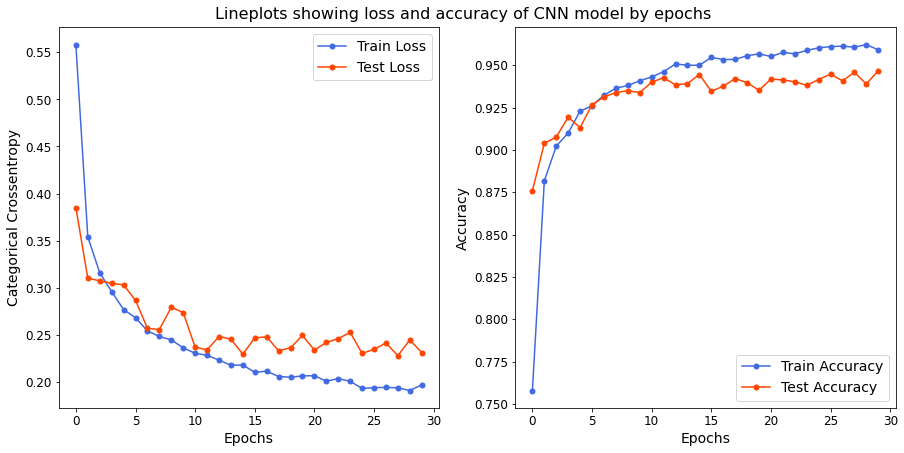

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)

In [ ]:
loss,acc = model.evaluate(x_test,  y_test, verbose=2)
print("Success rate: {:5.2f}%".format(100*acc))

118/118 - 1s - loss: 0.2310 - accuracy: 0.9469 - 615ms/epoch - 5ms/step
Success rate: 94.69%


In [ ]:
labels =["Male","Female"]
import matplotlib.pyplot as plt

118/118 [==============================] - 1s 4ms/step


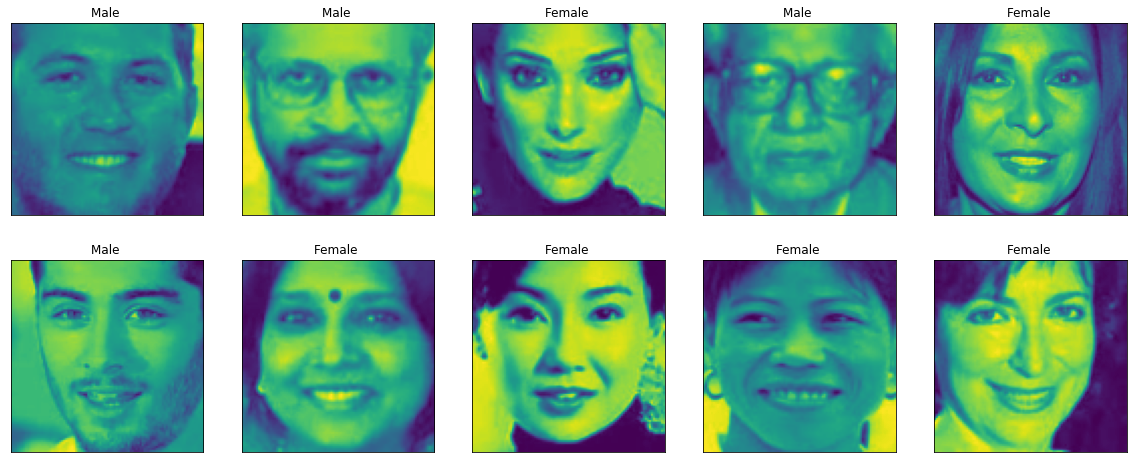

In [ ]:
Y = model.predict(x_test)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=10, replace=False)):
    ax = figure.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(Y[index])
    true_index = np.argmax(y_test[index])
    
    ax.set_title("{} ".format(labels[predict_index], 
                                  color=("green" if predict_index == true_index else "red")))
plt.show()